<a href="https://colab.research.google.com/github/czymaraclass/intros/blob/main/Intro_to_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro to R

Note: A translation of this intro is also available for [Python](https://colab.research.google.com/github/czymaraclass/intros/blob/main/Intro_to_Python.ipynb).

## Math operators

- Addition `+`
- Subtraction `-`
- Multiplication `*`
- Division `/`
- Exponentiation `^`
- Exponential `exp()`
- Logarithm `log()`
- And everything else...

In [ ]:
# Example

3+2

# Operators can also be combined

(3+5)/(4*2)

# But we don't need R for that…

[1] 5

[1] 1

## Objects

Crucially, R allows to store information (e. g., numbers or text) in an object
To create an object, use the assignment operator: `<-`

In [ ]:
result_1 <- 3+5

result_1

result_2 <- 4*2

result_2

[1] 8

[1] 8

These objects can be recalled:

In [ ]:
result_3 <- result_1 / result_2

result_3

# Note that object names can be anything, better avoid generic names such as result_1, result_2, result_3 :)

[1] 1

## Logical operators

Operators allow to test whether something is `TRUE` or `FALSE`:


In [ ]:
result_1 == result_2

result_1 == result_3

result_1 != result_3

result_1 > result_3

[1] TRUE

[1] FALSE

[1] TRUE

[1] TRUE

Operators can also be combined:

In [ ]:
8 == 8 & 8 > 1 # Both statements must be true

8 == 8 & 8 == 1

8 == 8 | 8 == 1 # Only one statement needs to be true

8 != 8 | 8 == 1


[1] TRUE

[1] FALSE

[1] TRUE

[1] FALSE

This will often be relevant when you create new variables or define your sample of analysis (e. g.: relevant age range from 18 to 65 and only natives).

## Vectors

Storing a single value (as in our object `result_1`) is not very interesting in most cases. If you want to store many values simultaneously, you work with *vectors*.




In [ ]:
variable_num <- c(8, 8, 1)

variable_num

Vectors don’t have to be numerical but can also be strings ("text"):

In [ ]:
variable_char <- c("a", "b", "c")

variable_char

We can also combine the numerical objects we created before:

In [ ]:
variable_num <- c(result_1, result_2, result_3)

variable_num

[1] 8 8 1

## Indexing

To recall a certain value of `variable_num`, use indexing. This is done via `[]`. Let's say we want to access the first element of `variable_num`:

In [ ]:
variable_num[1]
variable_num[2]
variable_num[3]

# Can also be nested:
variable_num[variable_num[3]]

[1] 8

[1] 8

[1] 1

[1] 8

## Important types of variables

- Logical: Binary variable with values `TRUE` and `FALSE`
- Character (string): Text (including symbols and numbers that are treated as text)
- Numeric: Numbers for mathematical operations
- Factor: Categories
- Most important for regression analysis: Factor and numeric correspond to *categorical* and *continuous* variables
- `NA` is an value that means missing value ("not available"), important if you work with real-world data


In [ ]:
# Examples

class(TRUE) # logical

class("this is 1 character") # character

class(123) # numeric

class(factor(c("first gen immigrant", "second gen immigrant", "native"))) # factor


[1] "logical"

[1] "character"

[1] "numeric"

[1] "factor"

## Data frames

So far, we learned about single variables (logical, numerical, character, factor). However, in most cases we won't analyze a bunch of unrelated variables but rather several variables of one (or more) data sets. Data sets (called *data frames* in R) are a collection of variables that are organized in a two-dimensional table:
- Column: variables
- Row: observations
- Cells: values
You can turn variables into a data frame using `data.frame()`.

In [ ]:
# Generate toy variables

id <- 1:10 # IDs

set.seed(1608)
income <- round(runif(10, min=42192-10000, max=42192+10000)) # income per year

set.seed(1608)
migrant <- ifelse(round(runif(10, min=0, max=1)) == 0, "immigrant", "native") # immigration status

set.seed(1608)
birthyear <- round(runif(10, min=1960, max=2000)) # year of birth

# Combine to data frame
toy_data <- data.frame(cbind(id, income, migrant, birthyear))

toy_data

id,income,migrant,birthyear
<chr>,<chr>,<chr>,<chr>
1,45784,native,1987
2,34299,immigrant,1964
3,48619,native,1993
4,36349,immigrant,1968
5,49980,native,1996
6,43415,native,1982
7,44130,native,1984
8,39862,immigrant,1975
9,39232,immigrant,1974


## Real world data: European Social Survey

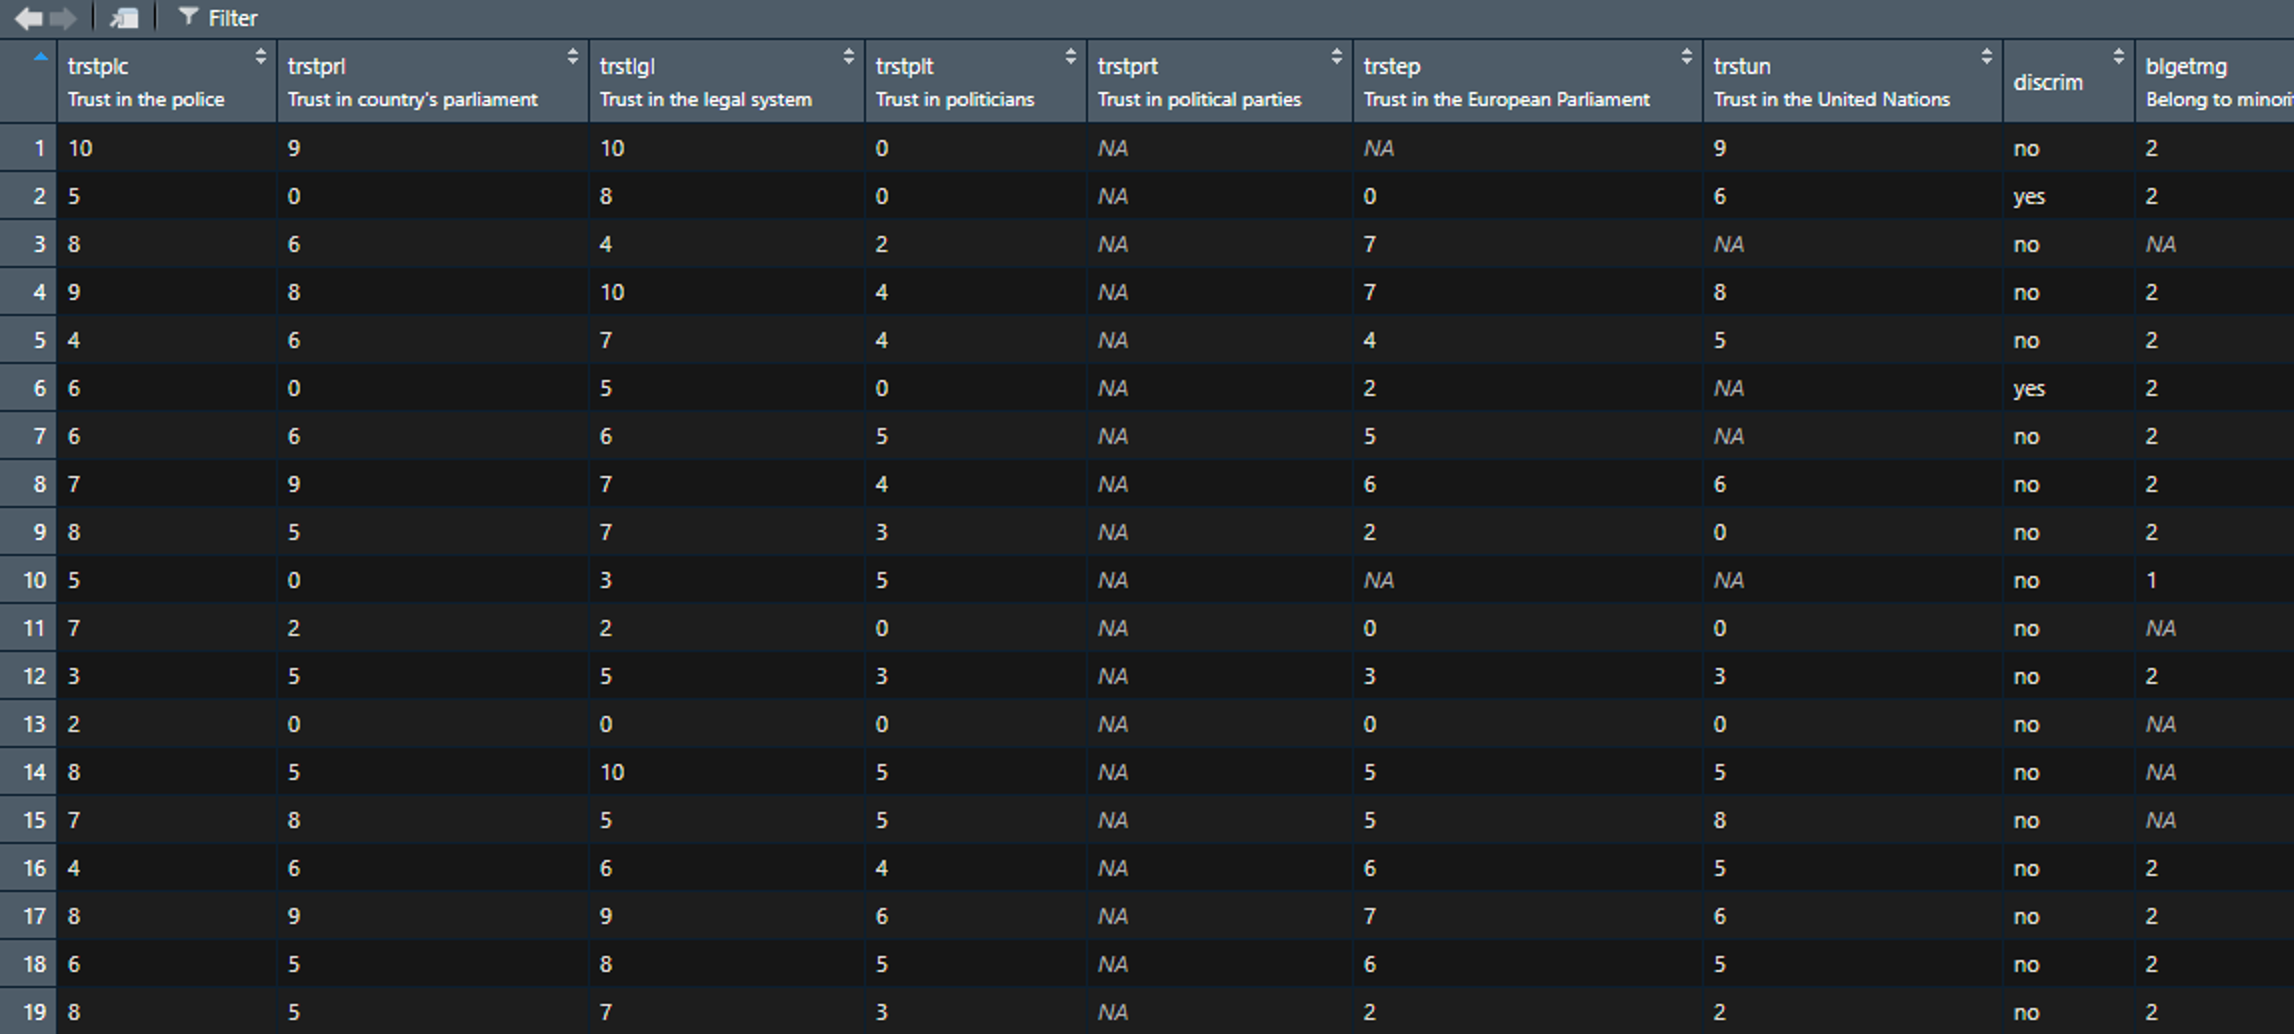

Use the $ operator to access a variable within the data frame:

In [ ]:
toy_data$migrant

[1] "native"    "immigrant" "native"    "immigrant" "native"    "native"   
 [7] "native"    "immigrant" "immigrant" "immigrant"

Better overview:

In [ ]:
table(toy_data$migrant)


immigrant    native 
        5         5 

## Recoding variables

Accessing existing variables is nice, but often we need to create new variables based on old ones. Example: How many observations have an income above the mean?



In [ ]:
toy_data$income <- as.numeric(toy_data$income) # Convert to numeric

toy_data$inc_ab_mean <- toy_data$income >= mean(toy_data$income)

toy_data

id,income,migrant,birthyear,inc_ab_mean
<chr>,<dbl>,<chr>,<chr>,<lgl>
1,45784,native,1987,TRUE
2,34299,immigrant,1964,FALSE
3,48619,native,1993,TRUE
4,36349,immigrant,1968,FALSE
5,49980,native,1996,TRUE
6,43415,native,1982,TRUE
7,44130,native,1984,TRUE
8,39862,immigrant,1975,FALSE
9,39232,immigrant,1974,FALSE


## Indexing

Like indexing for one-dimensional vectors, there is also indexing for the two-dimensional data frames in the form of: `dataframe[rows, columns]`. The first value refers to the rows you want to access, The second value refers to the columns you want to access. So `dataframe[1, 1]` will show the first observation's value of the first variable. If we are interested in all values of the first observation (row), we can use `dataframe[1, ]`. If we are interested in all values of the first variable, we can use `dataframe[, 1]`.

In [ ]:
# From our toy data

# All values of first "respondent"
toy_data[1, ]

# All values of first variable (ID)
toy_data[, 1]

,id,income,migrant,birthyear,age
,<chr>,<chr>,<chr>,<chr>,<dbl>
1,1,45784,native,1987,36


[1] "1"  "2"  "3"  "4"  "5"  "6"  "7"  "8"  "9"  "10"

## Subsetting data

Subsetting means reducing the data, either drop columns (variables) or rows (observations).


In [ ]:
# For example, only keeping variables migrant status and yearly income in the data set:
variables <- c("migrant", "income")

toy_data_sub_var <- toy_data[, variables]

toy_data_sub_var

# Or only keeping the first five observations
toy_data_sub_obs <- toy_data[1:5, ]

toy_data_sub_obs

migrant,income
<chr>,<dbl>
native,45784
immigrant,34299
native,48619
immigrant,36349
native,49980
native,43415
native,44130
immigrant,39862
immigrant,39232


,id,income,migrant,birthyear,inc_ab_mean
,<chr>,<dbl>,<chr>,<chr>,<lgl>
1,1,45784,native,1987,TRUE
2,2,34299,immigrant,1964,FALSE
3,3,48619,native,1993,TRUE
4,4,36349,immigrant,1968,FALSE
5,5,49980,native,1996,TRUE


## Functions

Most work in R uses functions. Functions (usually) require an *input* (often between `()`)and will create an *output*.

To access R's help, type `?function` (e.g. `?mean`). Or even better: Ask Google or ChatGPT.

In [ ]:
# Examples

mean(toy_data$income)

range(toy_data$income)

# Test for mean differences in income between immigrants and natives
t.test(income ~ migrant, data = toy_data)

[1] 41904.3

[1] 34299 49980


	Welch Two Sample t-test

data:  income by migrant
t = -5.5414, df = 7.5973, p-value = 0.0006543
alternative hypothesis: true difference in means between group immigrant and group native is not equal to 0
95 percent confidence interval:
 -12726.982  -5198.218
sample estimates:
mean in group immigrant    mean in group native 
                37423.0                 46385.6 


## Packages

There are several functions included in base R (e. g. `mean()`), but a lot of the things that make R really interesting have to be loaded into your working environment as *packages*.

Packages are a collection of (user-written) functions. To install packages, use the `install.packages()` function. You have to install a package only once, but you will have to load it every time you want to use it, using `library()`.


## Tidyverse

> "The tidyverse is an opinionated collection of R packages designed for data science. All packages share an underlying design philosophy, grammar, and data structures."
https://www.tidyverse.org/

The goal of the Tidyverse packages is to make data "tidy". Tidy is defined as:
- Variables in columns
- Observations in rows
- Values in cells
This is how we organized our data frame above.

Such tidy data is easier to read and process and required for the workflows of many functions.

## Example of untidy data: Eurostat
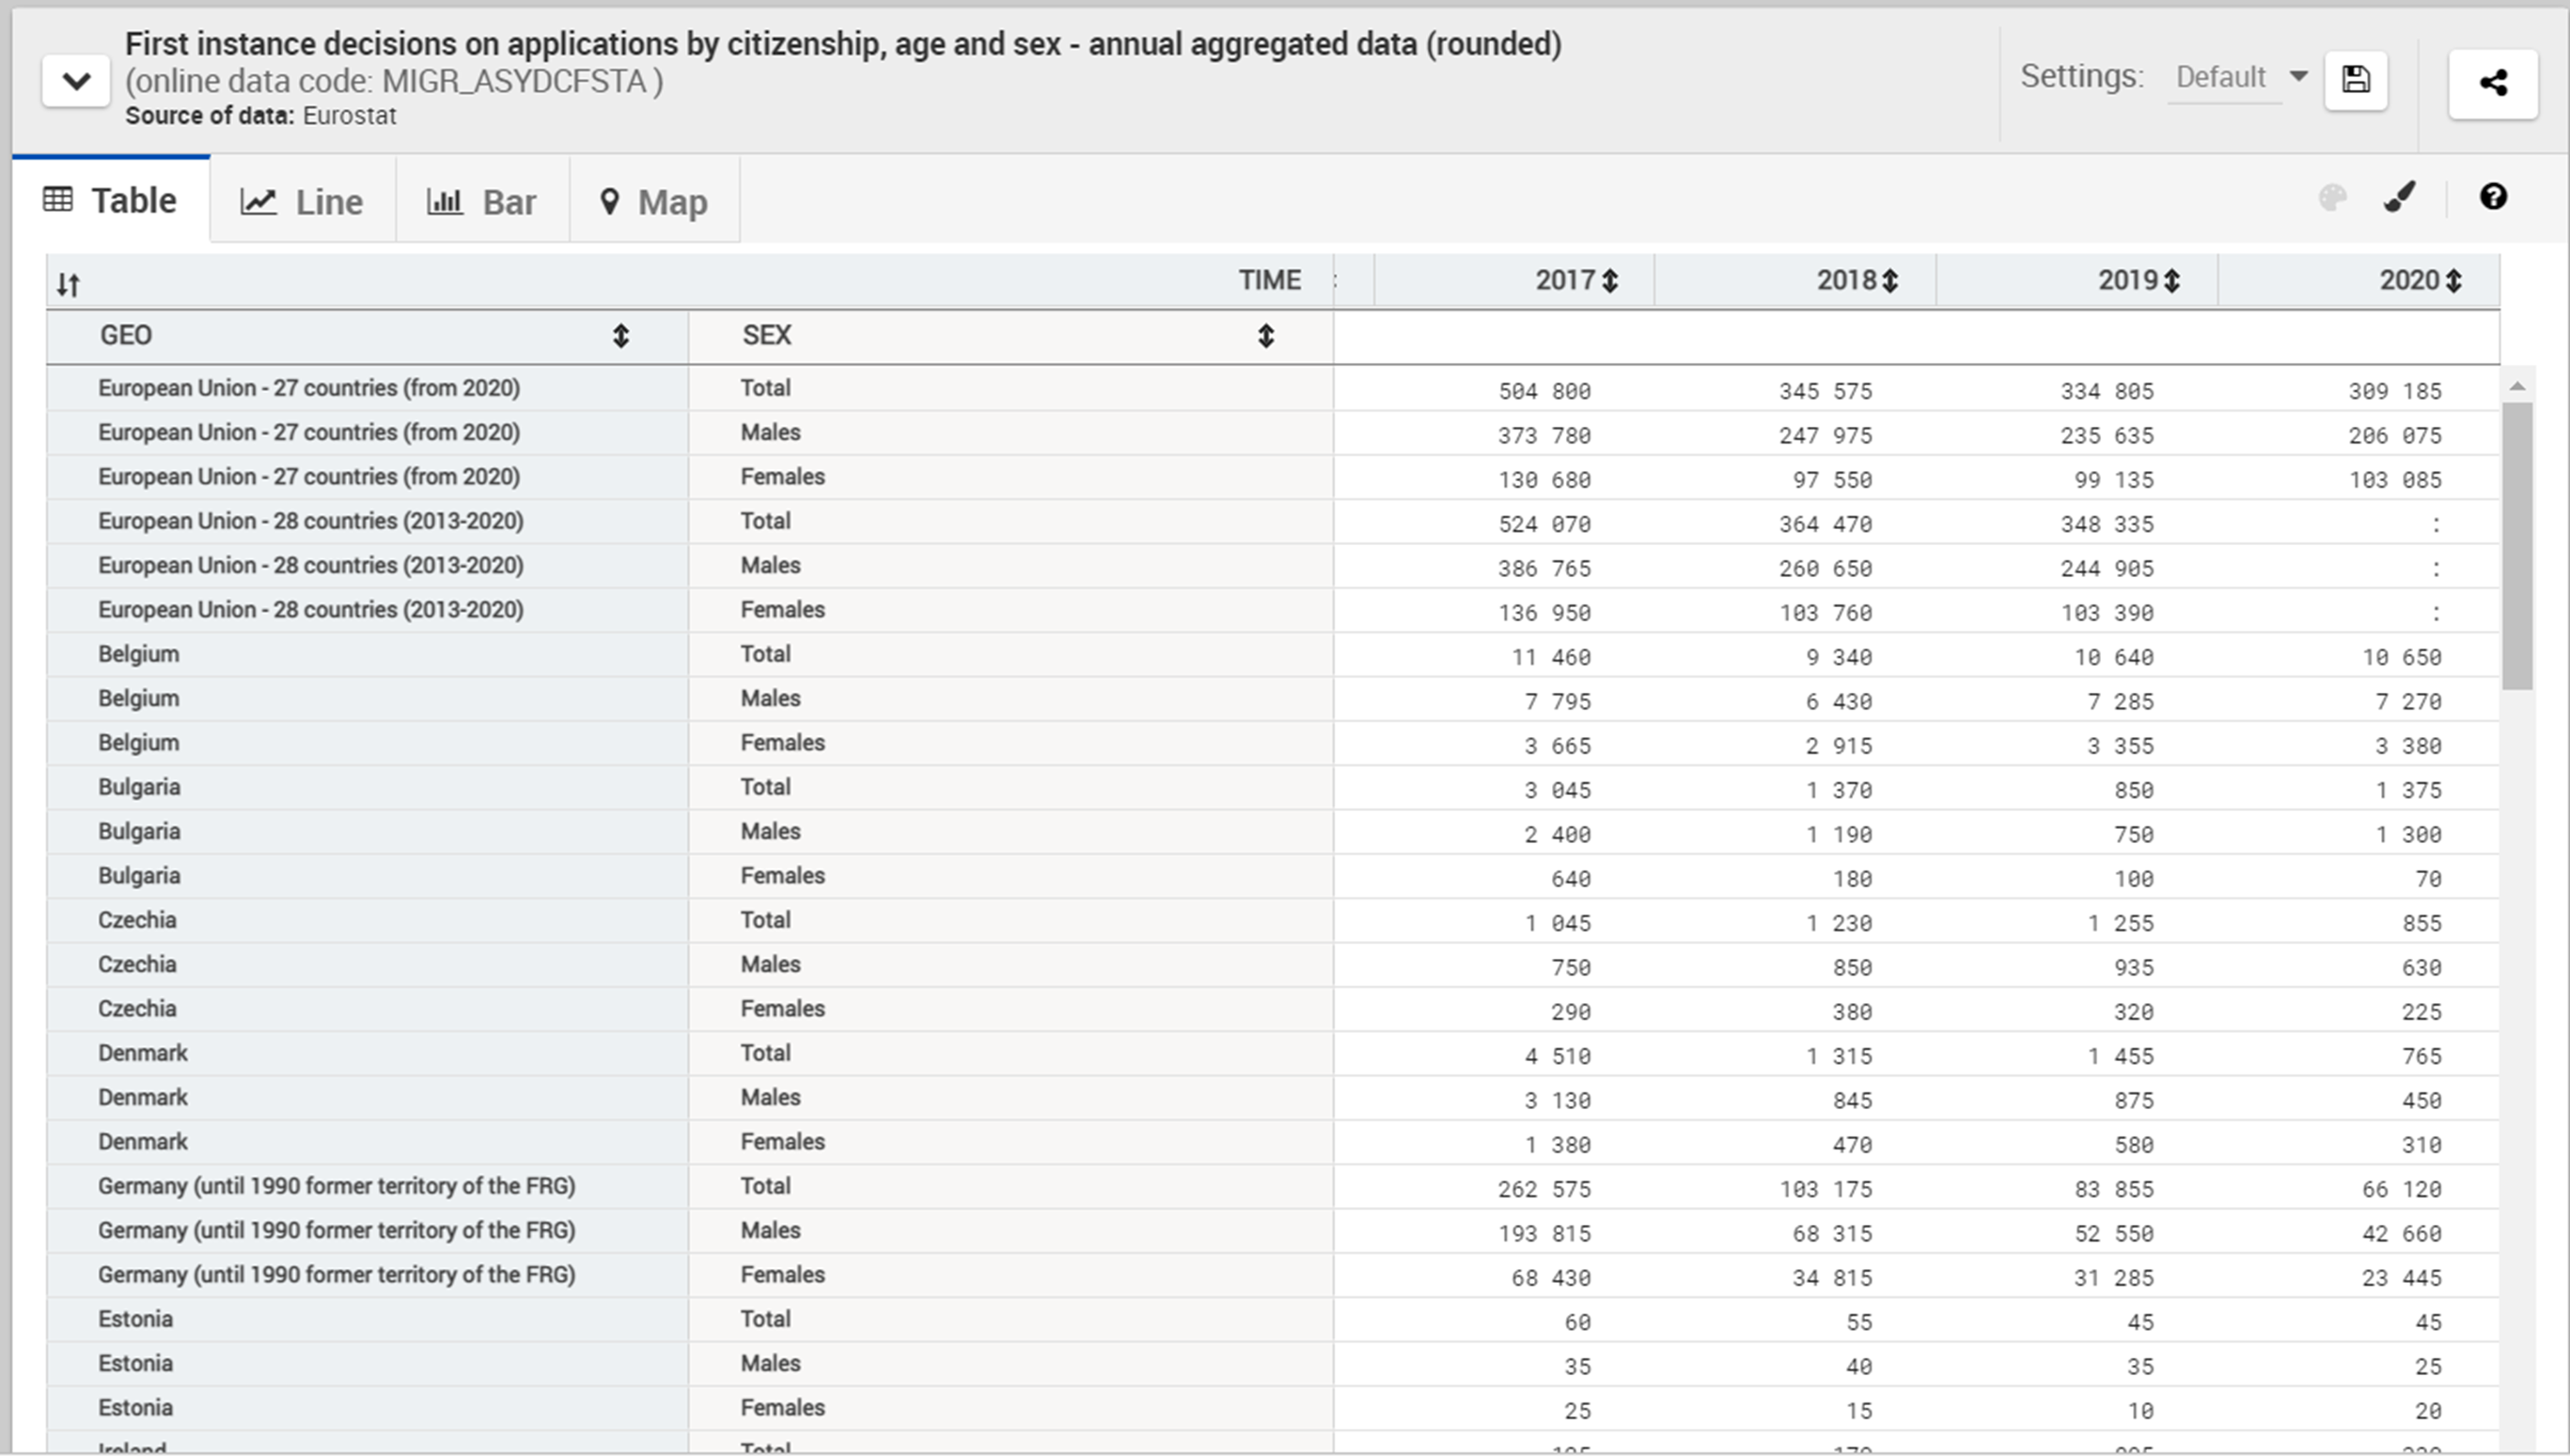

## (Some) important functions of the Tidyverse

There are a lot of possibilities to manipulate tidy data with the Tidyverse. One of the most useful packages of the Tidyverse is `dplyr()`. It includes:
- `filter()`: Filters observations, e. g.: filter(ESS, discrim == "yes")
- `mutate()`: Create variables, e. g.: ESS <- mutate(ESS, migr_year = inwyye - livecnta)
- `rename()`: Changes name of variable, e. g.: rename(ESS, discrim = dscrgrp)
- `summarize()`: Get some aggregate statistic (example later)
- ...

`mutate()` most potent when combined `ifelse()` to make conditional statements. Logic: `ifelse(logical test, value if TRUE, value if FALSE)`.

In [ ]:
ifelse(1 == 1, "This is TRUE", "This is FALSE")

ifelse(1 == 2, "This is TRUE", "This is FALSE")

library(dplyr) # load package

# generate variable that captures if person is native and has an income above the mean
toy_data <- mutate(toy_data, inc_nat = ifelse(migrant == "native" & inc_ab_mean == T,  "High income native", "Other"))

toy_data

[1] "This is TRUE"

[1] "This is FALSE"

id,income,migrant,birthyear,inc_ab_mean,age_over_mean,inc_nat
<chr>,<dbl>,<chr>,<chr>,<lgl>,<chr>,<chr>
1,45784,native,1987,TRUE,High income native,High income native
2,34299,immigrant,1964,FALSE,Other,Other
3,48619,native,1993,TRUE,High income native,High income native
4,36349,immigrant,1968,FALSE,Other,Other
5,49980,native,1996,TRUE,High income native,High income native
6,43415,native,1982,TRUE,High income native,High income native
7,44130,native,1984,TRUE,High income native,High income native
8,39862,immigrant,1975,FALSE,Other,Other
9,39232,immigrant,1974,FALSE,Other,Other


Or, for example, define immigration background in the ESS:

```
mutate(ESS, migr =
	ifelse(brncntr == 1 & mocntr == 1 & facntr == 	1, "native",
 		ifelse(brncntr == 2,
		"first gen immigrant",
			ifelse(brncntr == 1
			& (mocntr == 2 | facntr == 2),
			"second gen immigrant",
	NA)))) # 1=yes, 2=no
```




## Piping

Let's say we want to get the logarithm of 4, and round it to the first decimal:

In [ ]:
x <- log(4)

round(x, 1)

To have less code, R allows nesting functions:

In [ ]:
round(log(4), 1)

But that can be hard to read (from inside out), especially when nesting many functions. Piping allows to read from start to end:

In [ ]:
	4 %>%
 	 log() %>%
  	 round(1)

[1] 1.4

## Not covered here but awesome

- A bazillion more functions
- RStudio projects (incl. version control using GitHub)
- R Markdown: Create documents, websites, presentations etc. that automatically update numbers and figures if you change the data (no manual copy & pasting anymore!)
